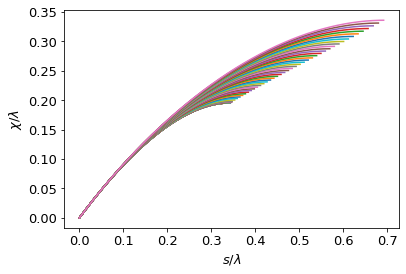

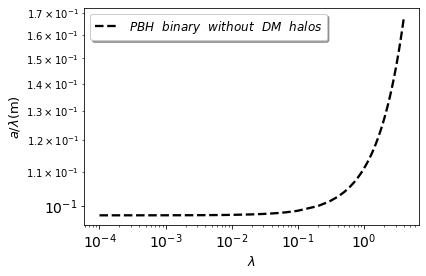

In [5]:
# For PBH binaries without dark matter halos and decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity






λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]


def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   





def semi(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((0.3422*λ_0 + 0.05466*(λ_0**2))+0.008215*(λ_0**3)),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        c=A/2
        if Δ<0:
            
            break
    return c



a_list=np.zeros(len(λ_list))    
for k, λ_0 in enumerate(λ_list):
    a_list[k] = semi(λ_0)
     
plt.rc('lines', linewidth=2.3) 


plt.figure(figsize=(6,4))    
plt.loglog(λ_list,a_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/λ$(m)',fontsize=13)   # a = semi-major axis of the PBH binary.
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.show()   

p=           2
0.001421 x + 0.01178 x + 0.09761


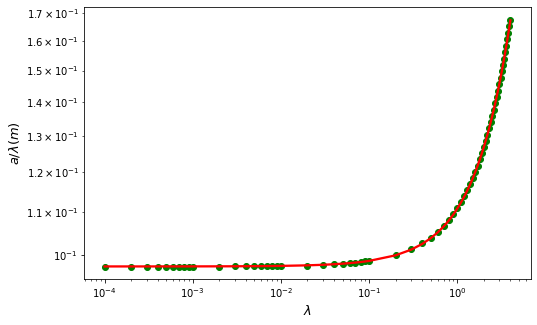

In [6]:
# Fitting of the the curve for the value of semi-major axis, a/λ vs λ for the PBH binary without 
# dark matter halos.


x = np.array(λ_list)

y = np.array(a_list)  


z = np.polyfit(x, y, 2)
p = np.poly1d(z)
print("p=",p)


plt.figure(figsize=(8,5))
plt.yscale('log')
plt.loglog(x,y,'go')
plt.plot(x,p(x),'r')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/λ(m)$',fontsize=13)
plt.show()

# this gives semi-major axis, a=(0.09761λ+0.0118λ^2)m.

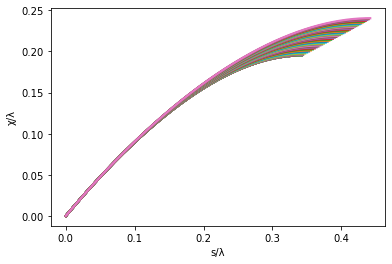

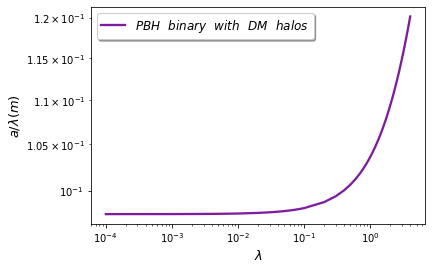

In [9]:
# For PBH binaries with dark matter halos and decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".



def M_halo(s):               #eq.(4) in reference pdf "M_DM at s_dec".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3)))




def n_mr(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k_mr(s):
    return (1/n_mr(s))

def λ_mr(s):
    return λ_0*k_mr(s)
   


def semi_(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_mr(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((0.3419*λ_0)+ (0.0285*(λ_0**2))-(0.000866*(λ_0**3))),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ')
    plt.ylabel('χ/λ')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        c=A/2
        if Δ<0:
           
            break
       
    return c
    
a_halo_list=np.zeros(len(λ_list))  # a = semi-major axis of the PBH binary.
for k, λ_0 in enumerate(λ_list):
    a_halo_list[k] = semi_(λ_0)


    
plt.figure(figsize=(6,4))    
plt.loglog(λ_list,a_halo_list,'#7E1E9C')
plt.xlabel('$λ$',fontsize=13) 
plt.ylabel('$a/λ(m)$',fontsize=13)         
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.show() 

p=             2
-0.0001449 x + 0.006225 x + 0.09757


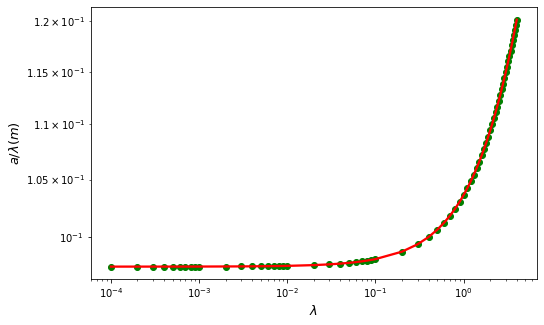

In [10]:
# Fitting of the the curve for the value of semi-major axis, a/λ vs λ for the PBH binary with 
# dark matter halos.


x = np.array(λ_list)

y = np.array(a_halo_list)  


z = np.polyfit(x, y, 2)
p = np.poly1d(z)
print("p=",p)


plt.figure(figsize=(8,5))
plt.loglog(x,y,'go')
plt.plot(x,p(x),'r')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$a/λ(m)$',fontsize=13)
plt.show()

# this gives semi-major axis, a_halo = (0.09757λ+0.0062λ^2)m.

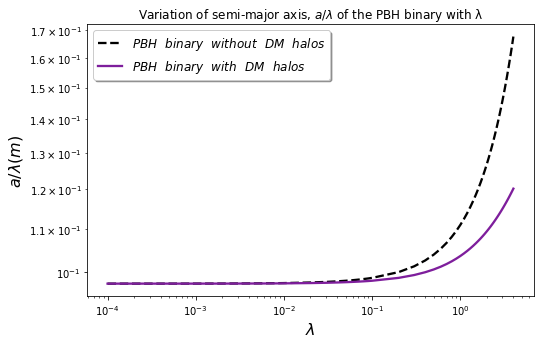

In [11]:
# Variation of  semi-major axis, a with λ for the PBH binaries with and without DM halos
# decoupling upto matter-radiation equality.

plt.figure(figsize=(8,5))
plt.loglog(λ_list,a_list,'k--')
plt.loglog(λ_list,a_halo_list,'#7E1E9C')
plt.xlabel('$λ$',fontsize=16)
plt.ylabel('$a/λ(m)$',fontsize=16)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.title('Variation of semi-major axis, $a/λ$ of the PBH binary with λ')
plt.show()